In [2]:
#Data for this model is available in same repository named as CarsDataset.zip
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [3]:
import os

In [4]:
import warnings
warnings.filterwarnings('ignore')
import zipfile as zf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from zipfile import ZipFile

data = pd.concat(
    [pd.read_csv(ZipFile('CarsDataset.zip').open(i)) for i in ZipFile('CarsDataset.zip').namelist()],
    ignore_index=True
)


In [5]:
final=data.copy()



In [6]:

for j in final["fuelType"].unique():
    df=final[final["fuelType"]==j]
    for i in final["engineSize"].unique():
        b=df[(df["engineSize"]==i)]#1.6
        if len(b)!=0:
            median=b["tax"].mean()
            d=df[df["tax"].isnull()]
            d["tax"]=median
            
            df[df["tax"].isnull()]=d
    final[final["fuelType"]==j]=df

In [7]:
final["mileage"]=final["mileage"]*1.609344

In [8]:
for j in final["fuelType"].unique():
    df=final[final["fuelType"]==j]
    for i in final["engineSize"].unique():
        b=df[(df["engineSize"]==i)]#1.6
        if len(b)!=0:
            median=b["mpg"].mean()
            d=df[df["mpg"].isnull()]
            d["mpg"]=median
           
            df[df["mpg"].isnull()]=d
    final[final["fuelType"]==j]=df

In [9]:
final["mpg"]=final["mpg"]/2.3521458

In [10]:
final.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
engineSize      0
tax             0
mpg             0
dtype: int64

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [12]:
Y=final["transmission"].values

In [13]:
X = final.drop(columns=["transmission","fuelType","model"]).values

In [14]:
final

,model,year,price,transmission,mileage,fuelType,engineSize,tax,mpg
0,C Class,2020,30495,Automatic,1931.212800,Diesel,2.0,120.928217,24.073534
1,C Class,2020,29989,Automatic,1609.344000,Petrol,1.5,156.514627,17.366245
2,C Class,2020,37899,Automatic,804.672000,Diesel,2.0,120.928217,24.073534
3,C Class,2019,30399,Automatic,8046.720000,Diesel,2.0,120.928217,24.073534
4,C Class,2019,29899,Automatic,7242.048000,Diesel,2.0,120.928217,24.073534
...,...,...,...,...,...,...,...,...,...
108535,Focus,2019,18745,Manual,12641.397120,Diesel,2.0,120.928217,24.073534
108536,Focus,2019,16350,Manual,22355.397504,Petrol,1.0,156.514627,17.366245
108537,Focus,2019,16850,Manual,21648.895488,Petrol,1.0,156.514627,17.366245
108538,Focus,2019,17310,Automatic,21526.585344,Petrol,1.0,156.514627,17.366245


In [15]:
X_train, X_test, y_train, y_test = \
train_test_split(X,Y, test_size=0.3, random_state=100)

In [16]:
clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=100)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=100)

In [17]:
clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=100)
clf_entropy.fit(X_train, y_train)
y_pred_en = clf_entropy.predict(X_test)

y_pred_en
accuracy_score(y_test, y_pred_en)*100

74.13549536269271

In [18]:
accuracy_score(y_test, y_pred_en)*100

74.13549536269271

In [19]:

#final["total"]=final["price"]+final["tax"]

In [20]:
vals=final["mileage"].unique().tolist()
vals.sort()
vals=pd.DataFrame(vals)
vals.median(),vals.max(),vals.min()

(0    40002.659136
 dtype: float64,
 0    519818.112
 dtype: float64,
 0    1.609344
 dtype: float64)

In [21]:
list=[]
for i in final["mileage"]:
    if i <=50000:
        list.append("low")
    elif 50000<i<=200000:
        list.append("medium")
    elif i > 200000:
        list.append("high")
    else:
        print(i)

In [22]:
list

['low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'medium',
 'medium',
 'medium',
 'medium',
 'medium',
 'medium',
 'medium',
 'low',
 'low',
 'medium',
 'medium',
 'medium',
 'medium',
 'medium',
 'medium',
 'medium',
 'medium',
 'medium',
 'medium',
 'medium',
 'medium',
 'medium',
 'medium',
 'medium',
 'medium',
 'medium',
 'medium',
 'medium',
 'medium',
 'medium',
 'medium',
 'medium',
 'medium',
 'medium',
 'medium',
 'medium',
 'medium',
 'low',
 'low',
 'medium',
 'low',
 'low',
 'low',
 'medium',
 'medium',
 'medium',
 'medium',
 'low',
 'medium',
 'medium',
 'low',
 'medium',
 'medium',
 'medium',
 'medium',
 'medium',
 'medium',
 'medium',
 'low',
 'low',
 'medium',
 'medium',
 'medium',
 'medium',
 'medium',
 'medium',
 'low',
 'low',
 'medium',
 'low',
 'low',
 'low',
 'medium',
 'medium',
 'medium',
 'low',
 'medium',
 'medium',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'medium',
 'medium',
 'medium',
 'low',
 'medium',
 'medium',
 '

In [23]:
final["usage"]=list

In [24]:
final

,model,year,price,transmission,mileage,fuelType,engineSize,tax,mpg,usage
0,C Class,2020,30495,Automatic,1931.212800,Diesel,2.0,120.928217,24.073534,low
1,C Class,2020,29989,Automatic,1609.344000,Petrol,1.5,156.514627,17.366245,low
2,C Class,2020,37899,Automatic,804.672000,Diesel,2.0,120.928217,24.073534,low
3,C Class,2019,30399,Automatic,8046.720000,Diesel,2.0,120.928217,24.073534,low
4,C Class,2019,29899,Automatic,7242.048000,Diesel,2.0,120.928217,24.073534,low
...,...,...,...,...,...,...,...,...,...,...
108535,Focus,2019,18745,Manual,12641.397120,Diesel,2.0,120.928217,24.073534,low
108536,Focus,2019,16350,Manual,22355.397504,Petrol,1.0,156.514627,17.366245,low
108537,Focus,2019,16850,Manual,21648.895488,Petrol,1.0,156.514627,17.366245,low
108538,Focus,2019,17310,Automatic,21526.585344,Petrol,1.0,156.514627,17.366245,low


# with all data

In [25]:
def dummies(x,df):
    temp = pd.get_dummies(df[x])
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df

final = dummies("fuelType",final)
final = dummies("transmission",final)


In [26]:
final= dummies("usage",final)

In [27]:
Y=final["model"].values

In [28]:
X = final.drop(columns=["model"]).values

In [40]:
X_train, X_test, y_train, y_test = \
train_test_split(X,Y, test_size=0.3, random_state=100)

In [41]:
clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=100)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=100)

In [44]:
X_train, X_test, y_train, y_test = \
train_test_split(X,Y, test_size=0.3, random_state=20)

In [45]:
y_pred_en = clf_entropy.predict(X_test)


y_pred_en

array([' Yaris', ' A Class', ' Touareg', ..., ' C Class', ' I20', ' Kuga'],
      dtype=object)

In [46]:
accuracy=accuracy_score(y_test, y_pred_en)*100
accuracy

93.21908973650267

In [47]:
y_pred_en=pd.DataFrame(y_pred_en)
y_test=pd.DataFrame(y_test)
y_test

,0
0,Yaris
1,A Class
2,Touareg
3,Q2
4,Scala
...,...
32557,1 Series
32558,1 Series
32559,C Class
32560,I20


In [48]:
predicted=pd.concat([y_pred_en,y_test],axis=1)

In [49]:
accuracy

93.21908973650267

In [50]:
predicted.columns=["predict","test"]
predicted.head(50)

,predict,test
0,Yaris,Yaris
1,A Class,A Class
2,Touareg,Touareg
3,Q2,Q2
4,Scala,Scala
5,EcoSport,EcoSport
6,Zafira,Zafira
7,Fiesta,Fiesta
8,Octavia,Octavia
9,Focus,Focus


In [51]:
l=np.where(predicted["test"] != predicted["predict"])

In [52]:
l=l[0].tolist()

In [53]:
len(l)-len(predicted)

-30354

In [54]:
len(l)/len(predicted)*100

6.7809102634973275

In [55]:
predicted["index"]=predicted.index.values.tolist()

# false predictions

In [56]:
predicted

,predict,test,index
0,Yaris,Yaris,0
1,A Class,A Class,1
2,Touareg,Touareg,2
3,Q2,Q2,3
4,Scala,Scala,4
...,...,...,...
32557,1 Series,1 Series,32557
32558,1 Series,1 Series,32558
32559,C Class,C Class,32559
32560,I20,I20,32560


# check for over or underfitting

In [57]:
print(clf_entropy.score(X_train,y_train))

0.9303219352970596


In [58]:
print(clf_entropy.score(X_train,y_train)).print(clf_entropy.score(X_test,y_test))

0.9321908973650267


# confusion matrix

In [59]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[515   4   9 ...   0   0   0]
 [ 11 331   4 ...   0   0   0]
 [  6   9 640 ...   0   0   0]
 ...
 [  0   0   0 ...  10   0   0]
 [  0   0   0 ...   0   3   0]
 [  0   0   0 ...   0   0   1]]

True Positives(TP) =  515

True Negatives(TN) =  331

False Positives(FP) =  4

False Negatives(FN) =  11


In [60]:
print("correct_predictions",cm[0,0]+cm[1,1])
print("incorrect_predictions",cm[0,1]+cm[1,0])



correct_predictions 846
incorrect_predictions 15


In [61]:
cm

array([[515,   4,   9, ...,   0,   0,   0],
       [ 11, 331,   4, ...,   0,   0,   0],
       [  6,   9, 640, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,  10,   0,   0],
       [  0,   0,   0, ...,   0,   3,   0],
       [  0,   0,   0, ...,   0,   0,   1]], dtype=int64)

In [ ]:
#sns.heatmap(cm, annot = True , fmt = "d")

In [ ]:
#cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 #index=['Predict Positive:1', 'Predict Negative:0'])

#sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
#import category_encoders as ce
#encoder = ce.OrdinalEncoder(cols=["model","transmission","fuelType","usage"])

#final = encoder.fit_transform(final)

#y_test = encoder.transform(y_test)

In [ ]:
#final

In [ ]:
#cor = np.abs(final.corr()["model"])
#cor

# VISUALIZATION AND ANALYSIS

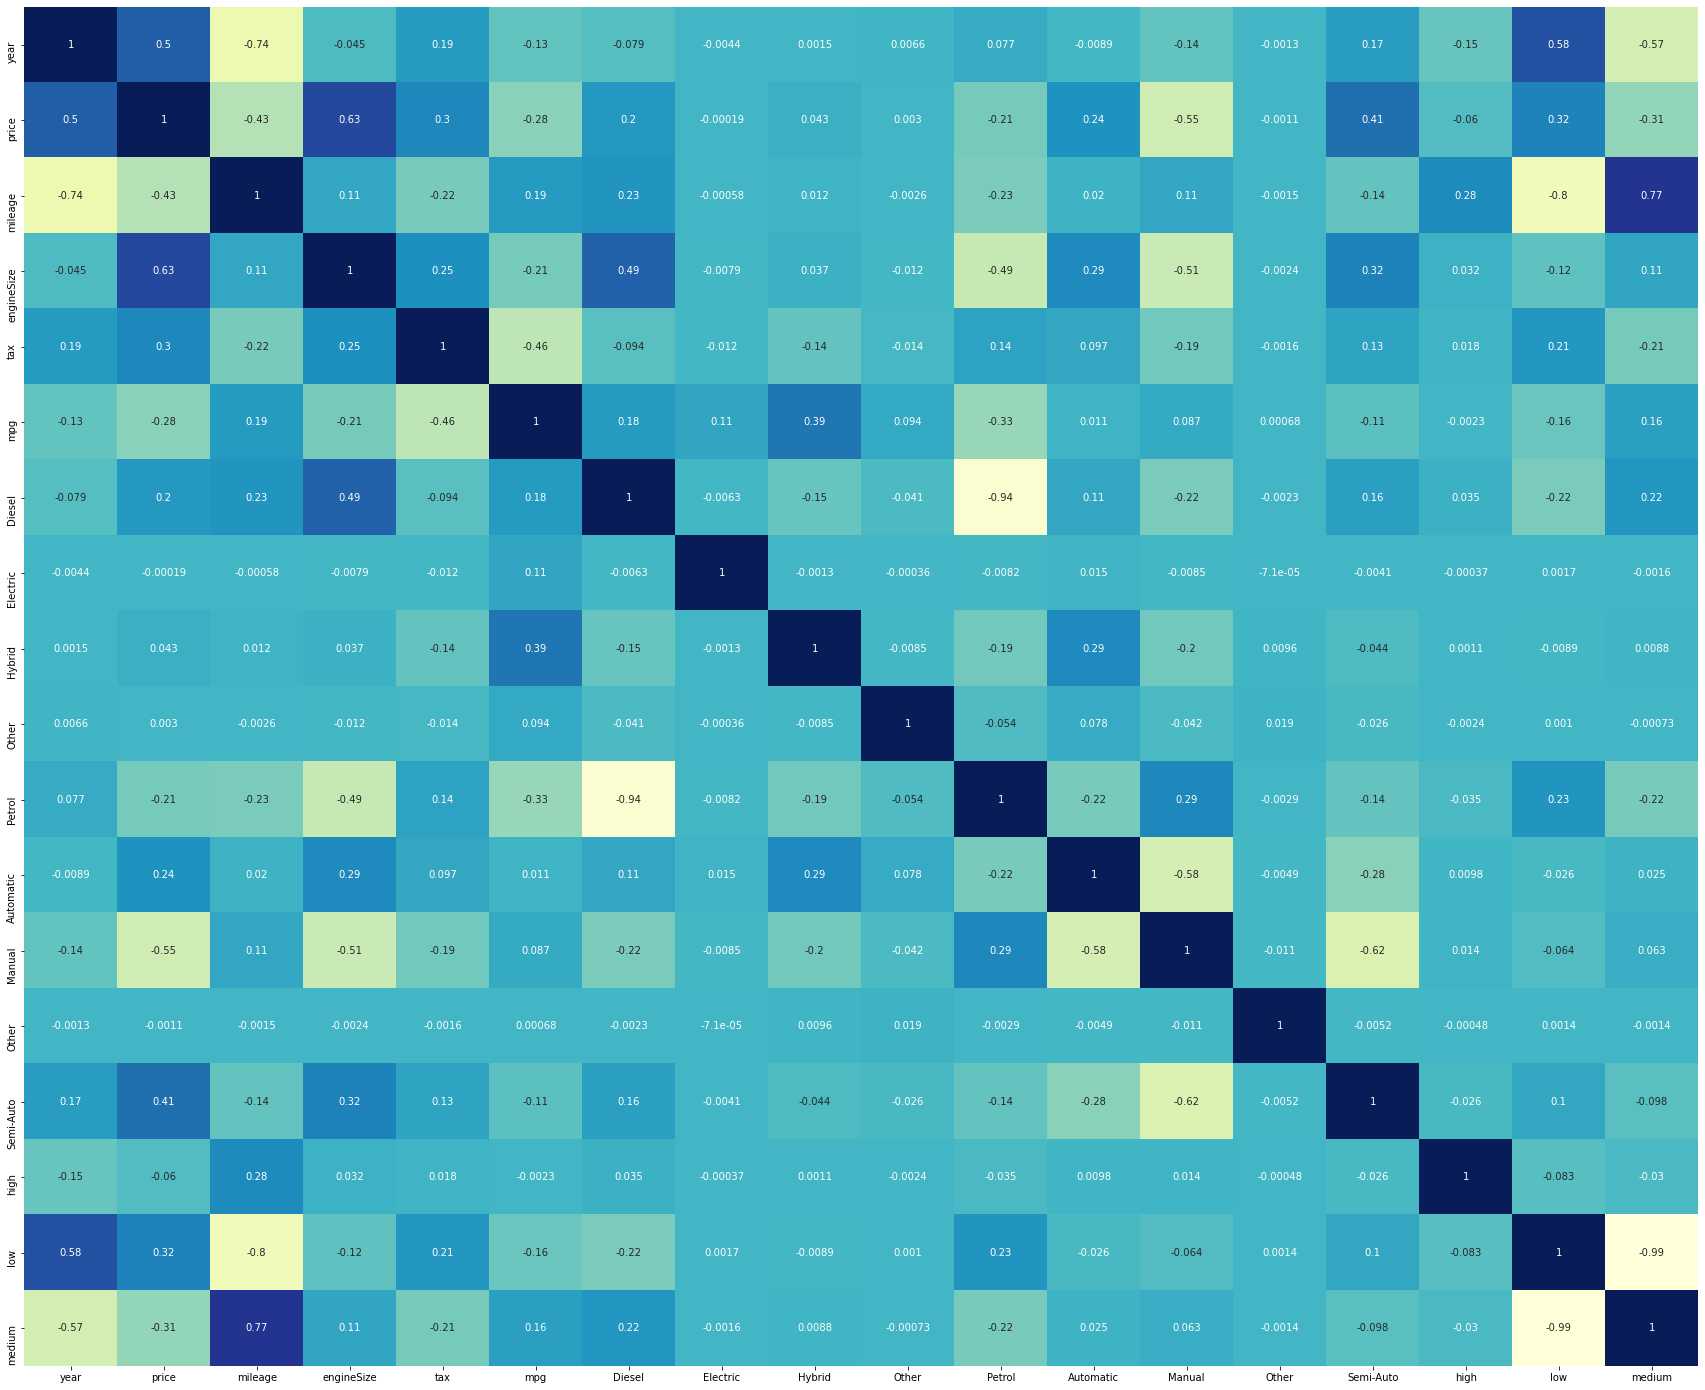

In [64]:
plt.figure(figsize=(30,25))

sns.heatmap(final.corr(),annot = True, cmap = "YlGnBu", cbar = False)
plt.show()

YEAR

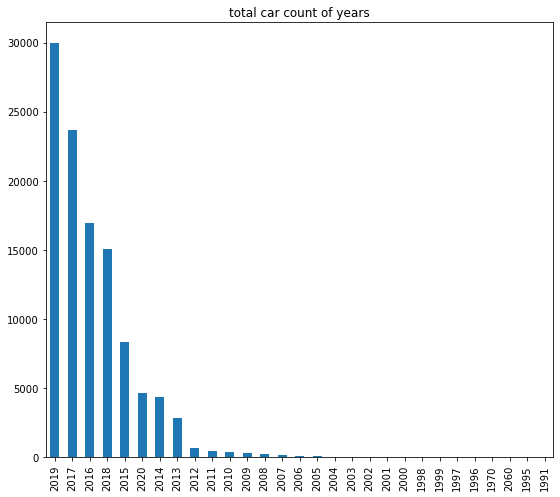

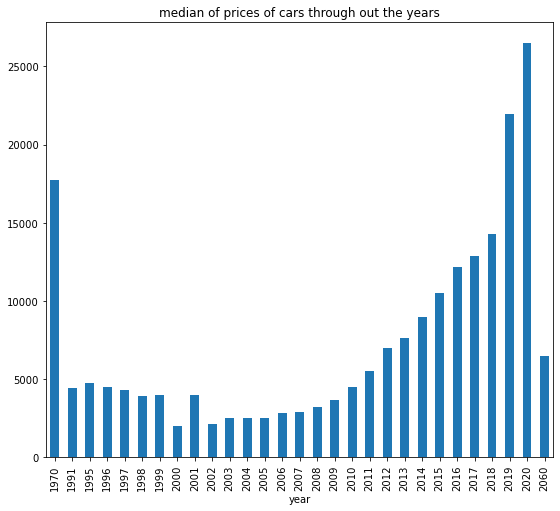

In [65]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title('total car count of years')
final["year"].value_counts().plot.bar()

plt.figure(figsize=(20,8))
plt.subplot(1,2,2)
plt.title('median of prices of cars through out the years')
data.groupby(["year"])["price"].median().plot.bar()


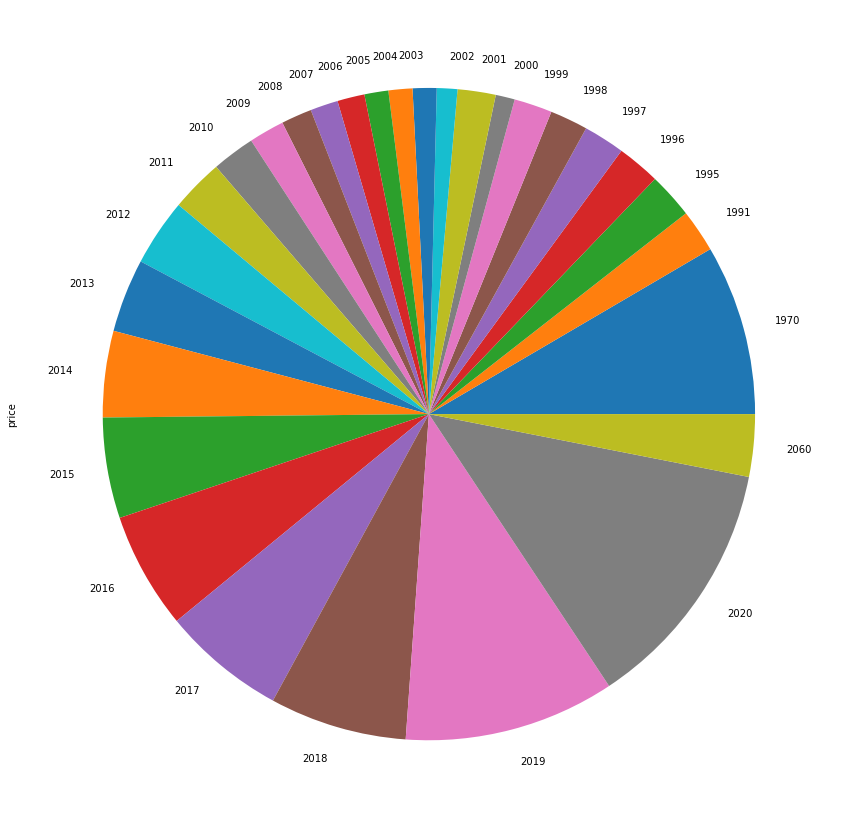

In [66]:
plt.figure(figsize=(15,15))
data.groupby(["year"])["price"].median().plot(kind='pie')


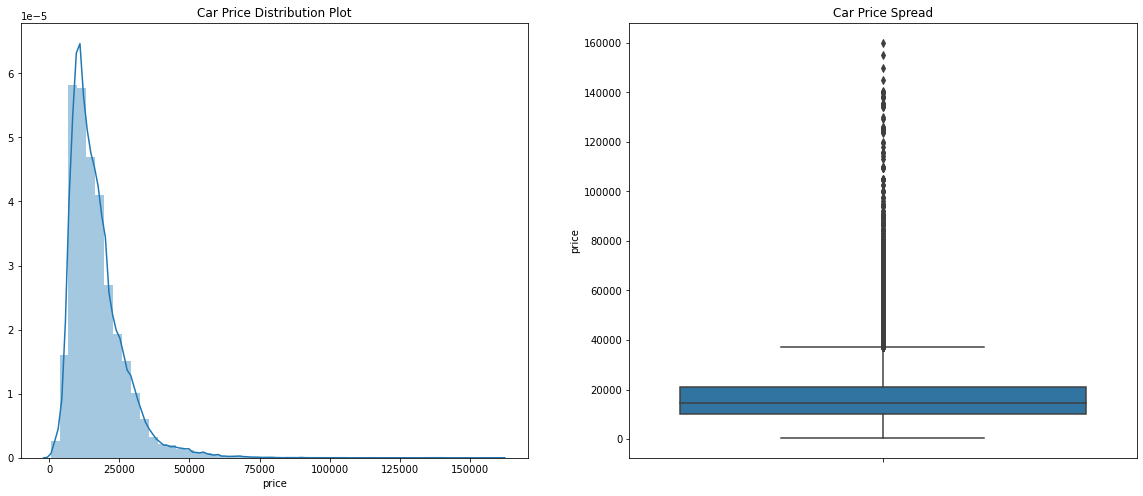

In [67]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(data.price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=data.price)

plt.show()

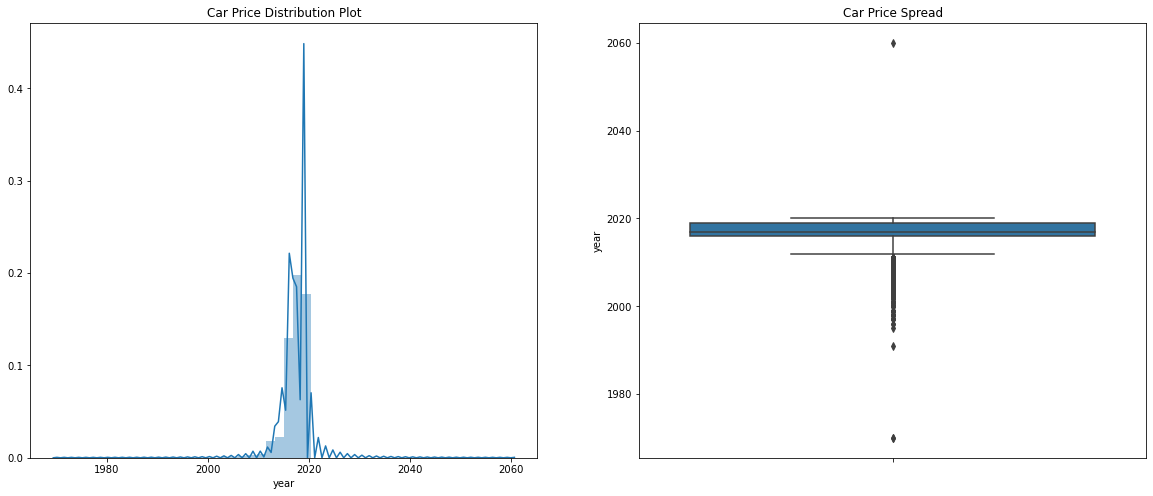

In [68]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(data.year)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=data.year)

plt.show()

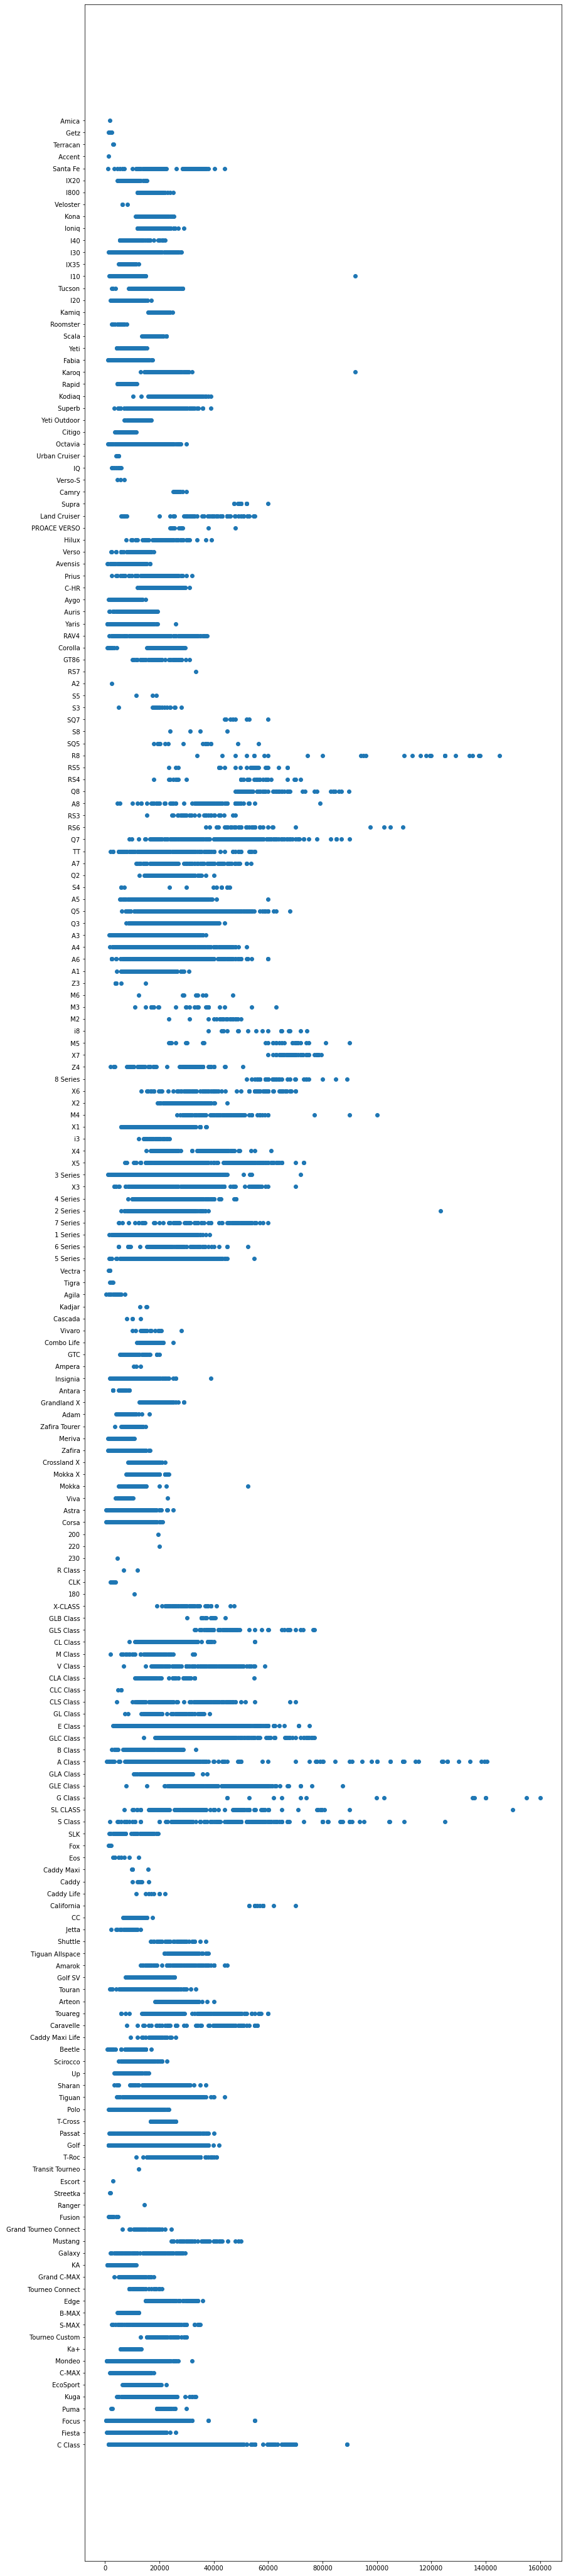

<Figure size 432x288 with 0 Axes>

In [70]:
def sp(x,figno):
    plt.subplot(1,2,figno)
    plt.scatter(final[x],final["model"])
    plt.show()
plt.figure(figsize=(30,75))
sp("price",1)

plt.tight_layout()

# All histograms

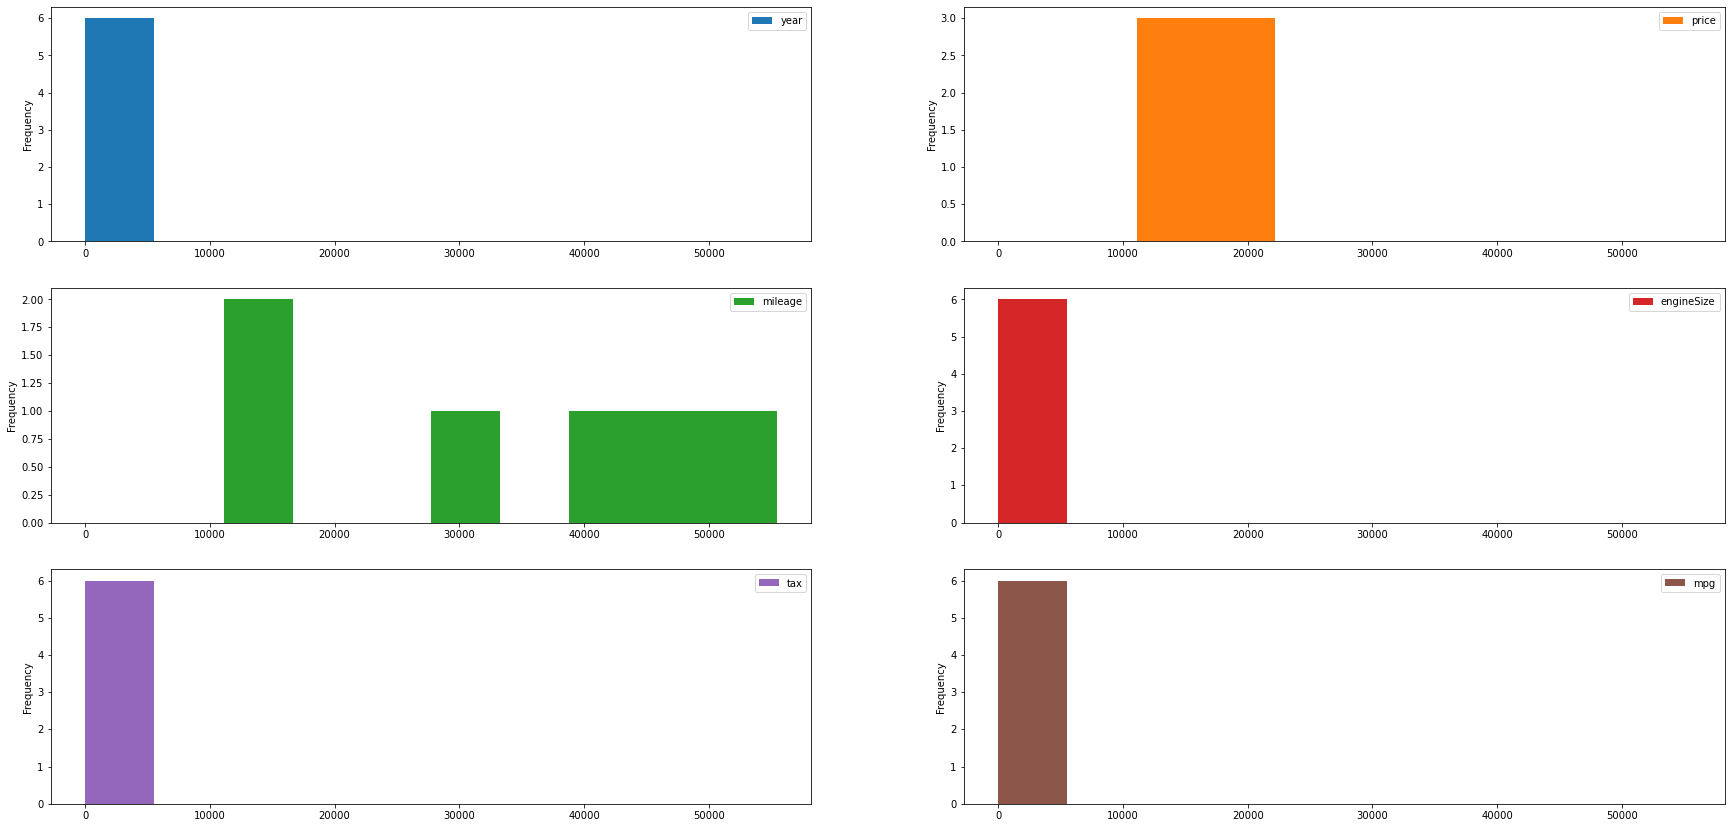

In [72]:
plt.rcParams['figure.figsize']=(30,25)

df.plot(kind='hist', bins=10, subplots=True, layout=(5,2), sharex=False, sharey=False)

plt.show()